In [ ]:
# Load the cleaned dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../ML-Exam/data/cleaned_airbnb_data.csv")

# Show the first few rows and check column names
df.head()


In [ ]:
# Step 1: Encode categorical features
df_encoded = pd.get_dummies(df, columns=['room_type', 'City'], drop_first=True)

# Step 2: Define features (X) and target (y)
X = df_encoded.drop(columns=['realSum', 'ID'])
y = df_encoded['realSum']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


**Interpretation:**

R² = 0.605 means the model explains about 60.5% of the variance in Airbnb prices.

In [4]:
df['realSum'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

In [5]:
# Filter out listings above the 99th percentile
threshold = df['realSum'].quantile(0.99)
df_filtered = df[df['realSum'] < threshold]

# Encode categorical features
df_encoded = pd.get_dummies(df_filtered, columns=['room_type', 'City'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['realSum', 'ID'])
y = df_encoded['realSum']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(5225.648978968223, 0.7830477172440429)

In [6]:
filtered_path = "../ML-Exam/data/cleaned_airbnb_data.csv"
df_filtered.to_csv(filtered_path, index=False)

In [7]:
# Drop non-numeric or ID columns for clustering
df_cluster = df_filtered.drop(columns=['ID', 'room_type', 'City'])

# Convert boolean-like columns explicitly to numeric (in case any were reloaded as objects)
for col in df_cluster.select_dtypes(include='object').columns:
    df_cluster[col] = df_cluster[col].astype('category').cat.codes

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Fit KMeans with a reasonable guess for k
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Assign cluster labels to the original dataframe
df_filtered['Cluster'] = kmeans.labels_

df_filtered[['realSum', 'person_capacity', 'bedrooms', 'dist', 'metro_dist', 'Cluster']].head()


C:\Users\Emili\AppData\Local\Temp\ipykernel_23488\28098137.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.labels_


,realSum,person_capacity,bedrooms,dist,metro_dist,Cluster
0,194.03,2,1,5.0,2.5,0
1,344.25,4,1,0.5,0.2,4
2,264.10,2,1,5.7,3.7,0
3,433.53,4,2,0.4,0.4,3
4,485.55,2,1,0.5,0.3,1


In [8]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Fit KMeans and assign labels
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate and display average feature values per cluster
cluster_summary = df_filtered.groupby('Cluster').mean(numeric_only=True)

# Display to user
cluster_summary


C:\Users\Emili\AppData\Local\Temp\ipykernel_23488\1854894731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)


,ID,realSum,room_shared_bool,room_private_bool,person_capacity,host_is_superhost_bool,multi_bool,biz_bool,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,Is_weekend_bool
Cluster,,,,,,,,,,,,,,
0,1625.561598,194.335877,0.0,0.682390,2.457331,0.330497,0.690591,0.011037,9.626649,95.074547,0.965224,4.137329,0.964632,0.503761
1,1551.822595,246.919835,0.0,0.255317,2.846946,0.245232,0.001306,0.572556,9.593771,94.273136,0.859591,2.506443,0.487015,0.515494
2,1572.401639,143.566093,1.0,0.000000,3.702186,0.112022,0.204918,0.601093,8.937158,89.674863,1.000000,3.592350,0.656284,0.508197
3,1616.632399,368.139145,0.0,0.030674,4.874559,0.282340,0.272442,0.339671,9.548412,94.191984,2.027244,2.862387,0.654528,0.495198
4,1900.479588,245.893693,0.0,0.490951,2.841751,0.009259,0.154672,0.614899,7.451389,74.238005,0.980429,3.516772,0.604061,0.502104


C:\Users\Emili\AppData\Local\Temp\ipykernel_23488\1163397117.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)


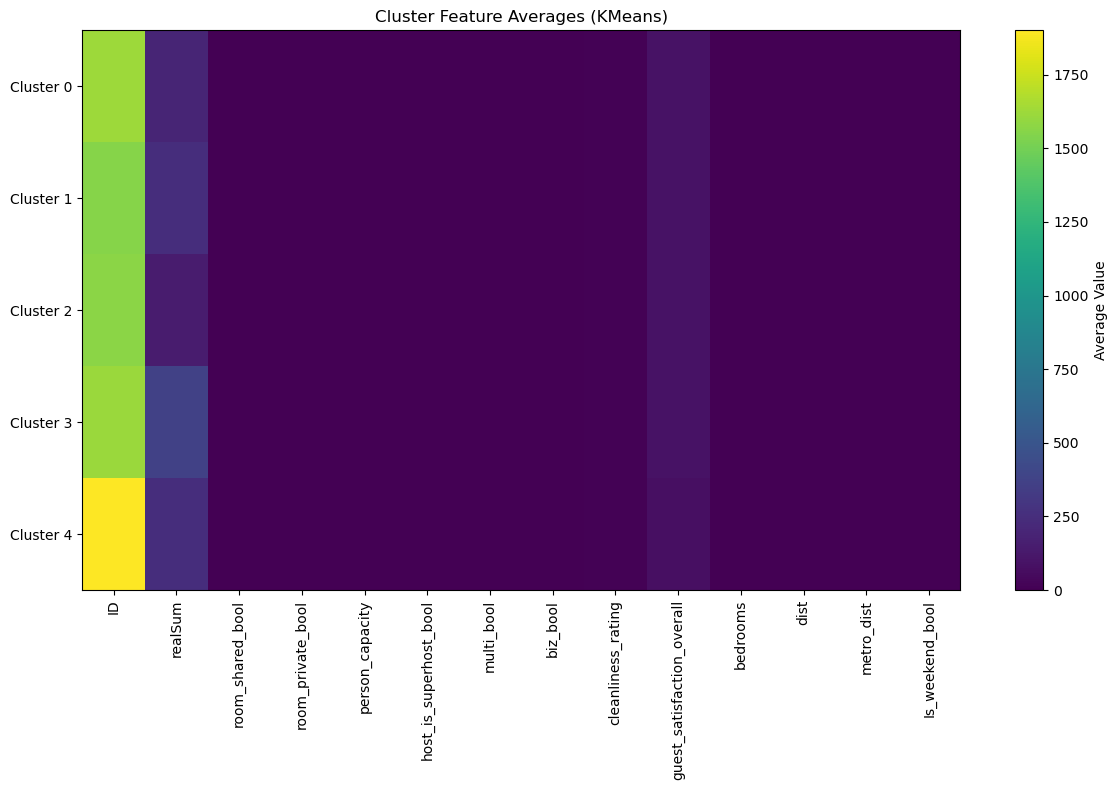

In [9]:

# Convert any remaining object columns to numeric
for col in df_cluster.select_dtypes(include='object').columns:
    df_cluster[col] = df_cluster[col].astype('category').cat.codes

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Fit KMeans and assign cluster labels
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Compute average feature values per cluster
cluster_summary = df_filtered.groupby('Cluster').mean(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(cluster_summary, aspect='auto', cmap='viridis')
plt.colorbar(label='Average Value')
plt.xticks(ticks=range(len(cluster_summary.columns)), labels=cluster_summary.columns, rotation=90)
plt.yticks(ticks=range(len(cluster_summary.index)), labels=[f'Cluster {i}' for i in cluster_summary.index])
plt.title("Cluster Feature Averages (KMeans)")
plt.tight_layout()
plt.show()

C:\Users\Emili\AppData\Local\Temp\ipykernel_23488\1217325832.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)


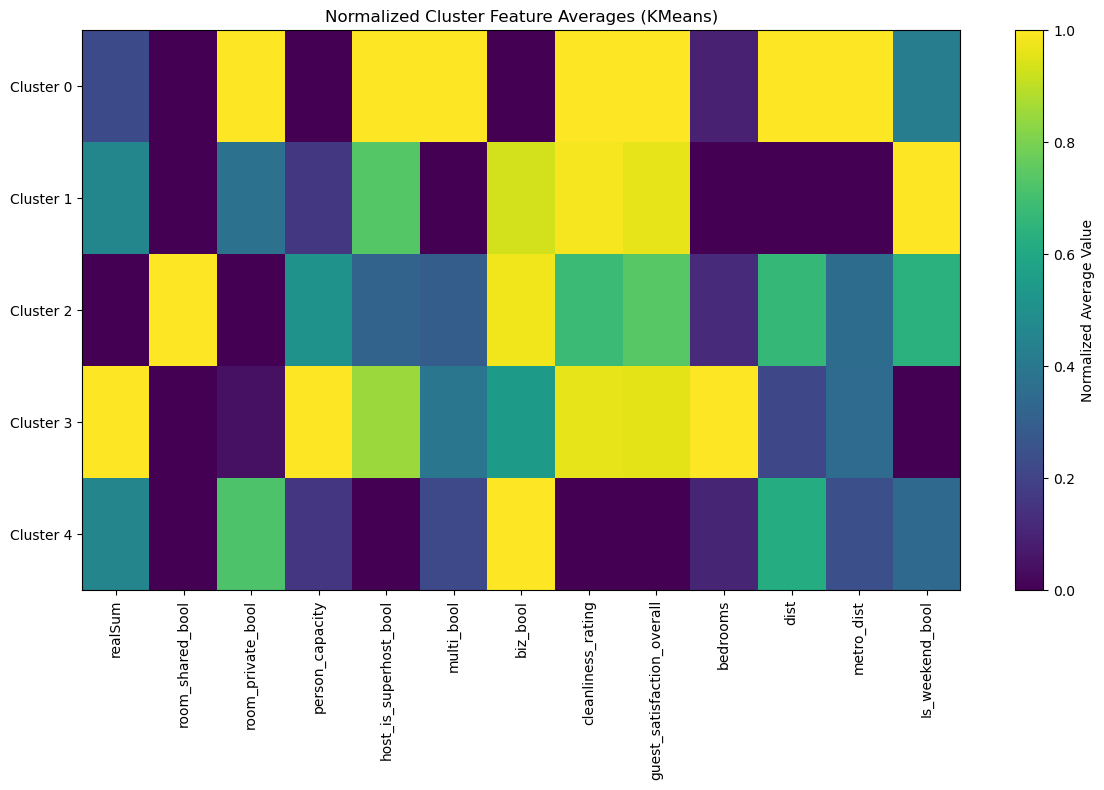

In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Fit KMeans and assign cluster labels
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Recompute cluster averages without ID
cluster_summary_clean = df_filtered.drop(columns=['ID']).groupby('Cluster').mean(numeric_only=True)

# Normalize for heatmap clarity
normalized_summary = (cluster_summary_clean - cluster_summary_clean.min()) / (cluster_summary_clean.max() - cluster_summary_clean.min())

# Plot the improved heatmap
plt.figure(figsize=(12, 8))
plt.imshow(normalized_summary, aspect='auto', cmap='viridis')
plt.colorbar(label='Normalized Average Value')
plt.xticks(ticks=range(len(normalized_summary.columns)), labels=normalized_summary.columns, rotation=90)
plt.yticks(ticks=range(len(normalized_summary.index)), labels=[f'Cluster {i}' for i in normalized_summary.index])
plt.title("Normalized Cluster Feature Averages (KMeans)")
plt.tight_layout()
plt.show()

Improvement percentages for each additional cluster:
  k=2: 15.79% improvement
  k=3: 13.96% improvement
  k=4: 13.94% improvement
  k=5: 14.30% improvement
  --> Last value above 10% threshold
  k=6: 7.50% improvement
  k=7: 7.08% improvement
  k=8: 5.07% improvement
  k=9: 6.25% improvement
  k=10: 4.94% improvement


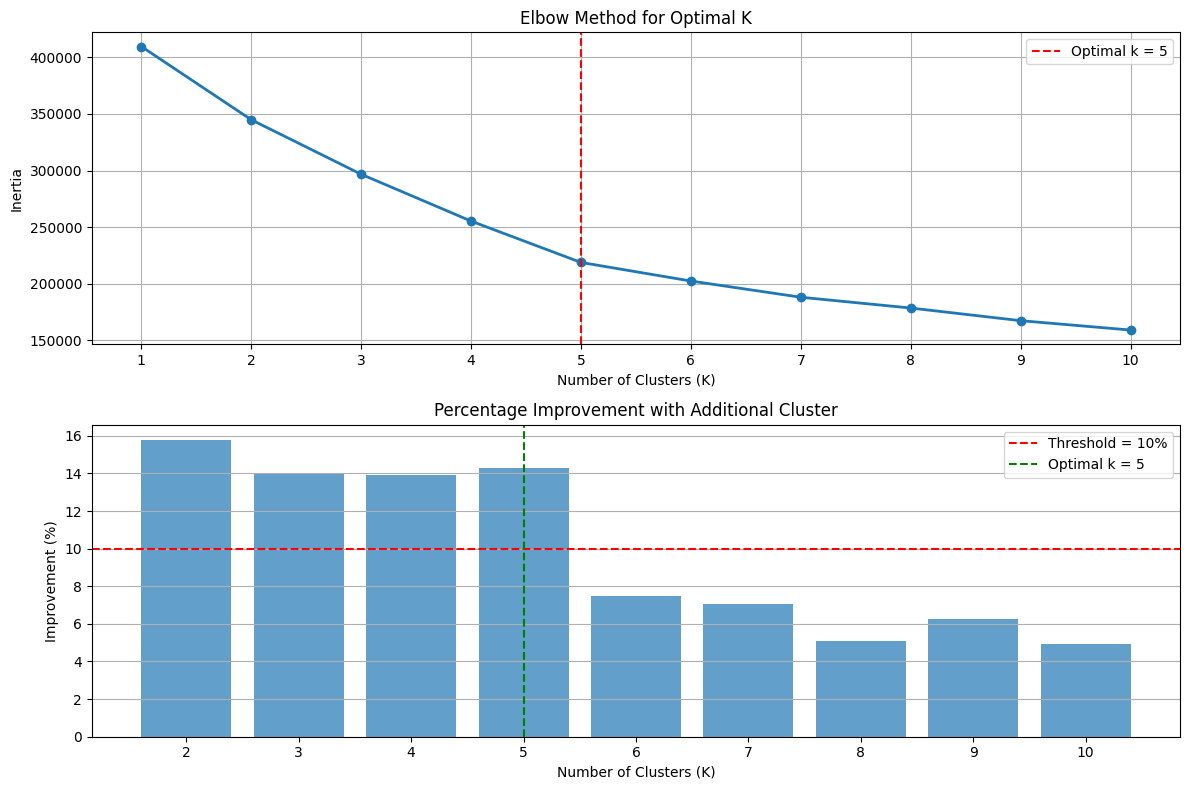

Automatically determined optimal k = 5 (last cluster with improvement >= 10%)


In [50]:
# Implementing K-Means clustering on the dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# Select numerical features for clustering
numerical_features = ['realSum', 'person_capacity', 'cleanliness_rating', 
                      'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
                      'host_is_superhost_bool']


# Create a copy of the data with just numerical features
cluster_data = df[numerical_features].copy()

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Find the elbow point using the rate of change
inertia_array = np.array(inertia)
# Calculate percentage of change in inertia
inertia_diffs = np.diff(inertia_array) / inertia_array[:-1] * 100
# Convert to absolute values (since changes are negative)
inertia_diffs_abs = np.abs(inertia_diffs)

# Find the last k value where improvement is above the threshold
threshold = 10  # percentage improvement threshold
optimal_k = 2  # default to 2 if no clear elbow

# Identify the last k value where the improvement is above threshold
last_above_threshold = None
for i, diff_pct in enumerate(inertia_diffs_abs):
    k_value = i + 2  # k value is i+2 (since we're looking at differences and k starts at 1)
    if diff_pct >= threshold:
        last_above_threshold = k_value

# Set optimal_k to be the last k with improvement above threshold
if last_above_threshold is not None:
    optimal_k = last_above_threshold  # Use exactly the last k above threshold

# Print the actual improvement percentages for clarity
print("Improvement percentages for each additional cluster:")
for i, pct in enumerate(inertia_diffs_abs):
    k_val = i + 2  # k starts at 2 for diffs
    print(f"  k={k_val}: {pct:.2f}% improvement")
    if k_val == last_above_threshold:
        print(f"  --> Last value above {threshold}% threshold")

# Plot the elbow curve
plt.figure(figsize=(12, 8))

# Main plot - inertia
plt.subplot(2, 1, 1)
plt.plot(k_range, inertia, marker='o', linewidth=2)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.legend()

# Secondary plot - percentage improvement
plt.subplot(2, 1, 2)
plt.bar(range(2, len(k_range) + 1), inertia_diffs_abs, alpha=0.7)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}%')
# Mark the optimal k
plt.axvline(x=optimal_k, color='green', linestyle='--', 
           label=f'Optimal k = {optimal_k}')
plt.title('Percentage Improvement with Additional Cluster')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Improvement (%)')
plt.xticks(range(2, len(k_range) + 1))
plt.grid(True, axis='y')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Automatically determined optimal k = {optimal_k} (last cluster with improvement >= {threshold}%)")

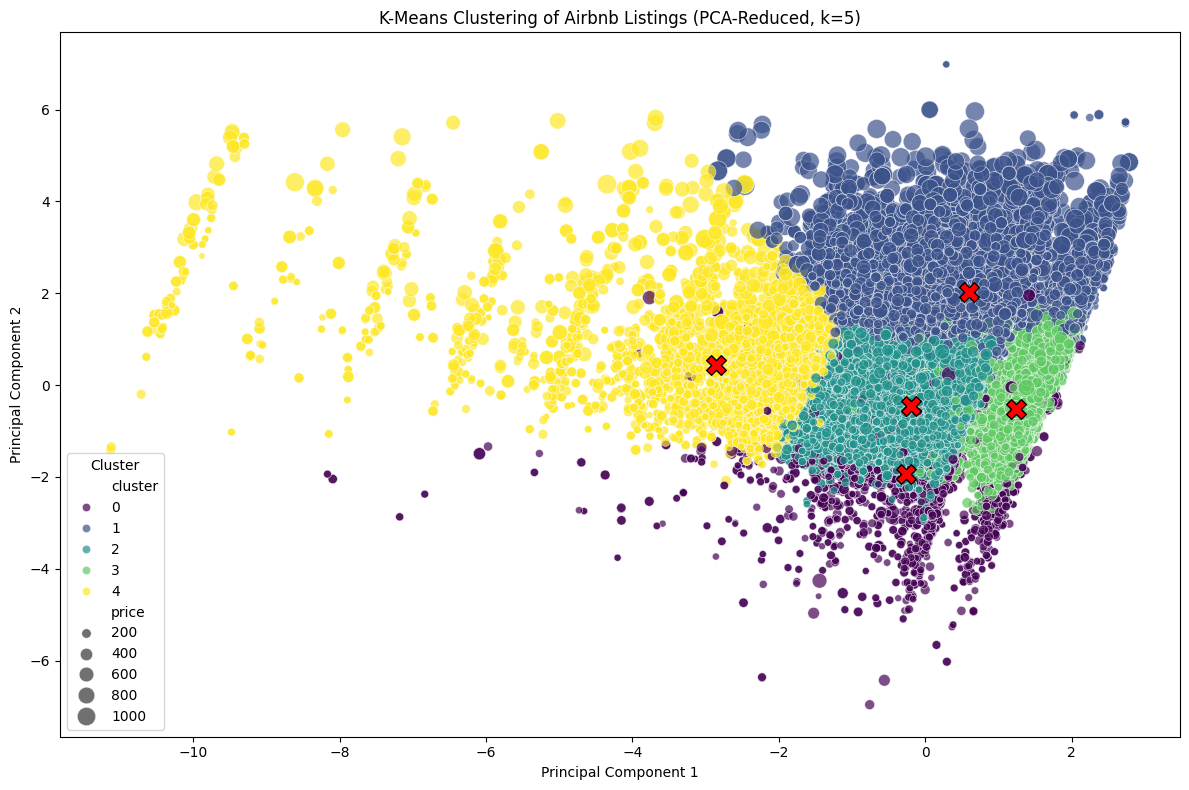

In [51]:
# Apply K-Means with the optimal K determined from the elbow curve
# No need to hardcode optimal_k - it was calculated in the previous cell

# Apply K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a dataframe with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels
pca_df['price'] = df['realSum']

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='cluster',
    size='price',
    sizes=(20, 200),
    palette='viridis',
    data=pca_df,
    alpha=0.7
)

# Add centers to the plot
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker='X', edgecolor='black')

plt.title(f'K-Means Clustering of Airbnb Listings (PCA-Reduced, k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,host_is_superhost_bool
Cluster 0,190.110000,2.790000,9.490000,94.110000,1.170000,8.920000,3.590000,0.210000
Cluster 1,425.200000,4.930000,9.500000,93.690000,2.020000,2.720000,0.550000,0.170000
Cluster 2,227.460000,2.630000,9.530000,93.660000,0.890000,2.970000,0.520000,-0.000000
Cluster 3,216.350000,2.930000,9.850000,97.030000,1.030000,2.750000,0.550000,1.000000
Cluster 4,247.440000,2.910000,7.410000,74.540000,0.980000,3.330000,0.520000,0.010000



Cluster Sizes:


,Count,Percentage
Cluster 0,2484,4.9%
Cluster 1,9353,18.3%
Cluster 2,23539,46.0%
Cluster 3,10984,21.5%
Cluster 4,4829,9.4%


Z-score normalized cluster means by feature group (scaled to [0,1] for visualization):


,Location,Accommodation,Quality,Price,Superhost
Cluster 0,1.000000,0.400000,0.600000,0.280000,0.450000
Cluster 1,0.360000,1.000000,0.590000,0.990000,0.420000
Cluster 2,0.370000,0.310000,0.590000,0.400000,0.310000
Cluster 3,0.360000,0.400000,0.700000,0.360000,0.990000
Cluster 4,0.400000,0.380000,0.000000,0.460000,0.320000


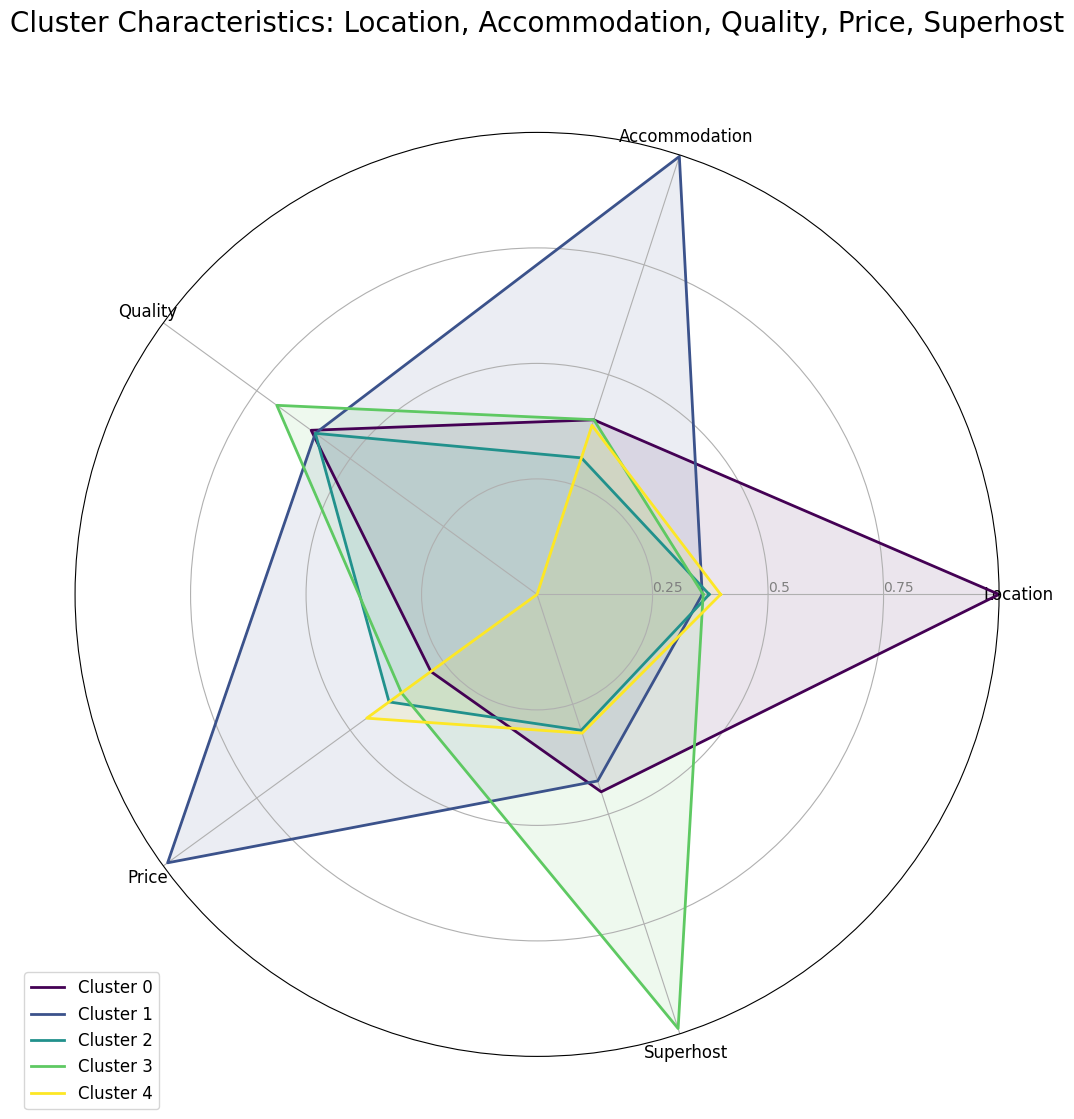

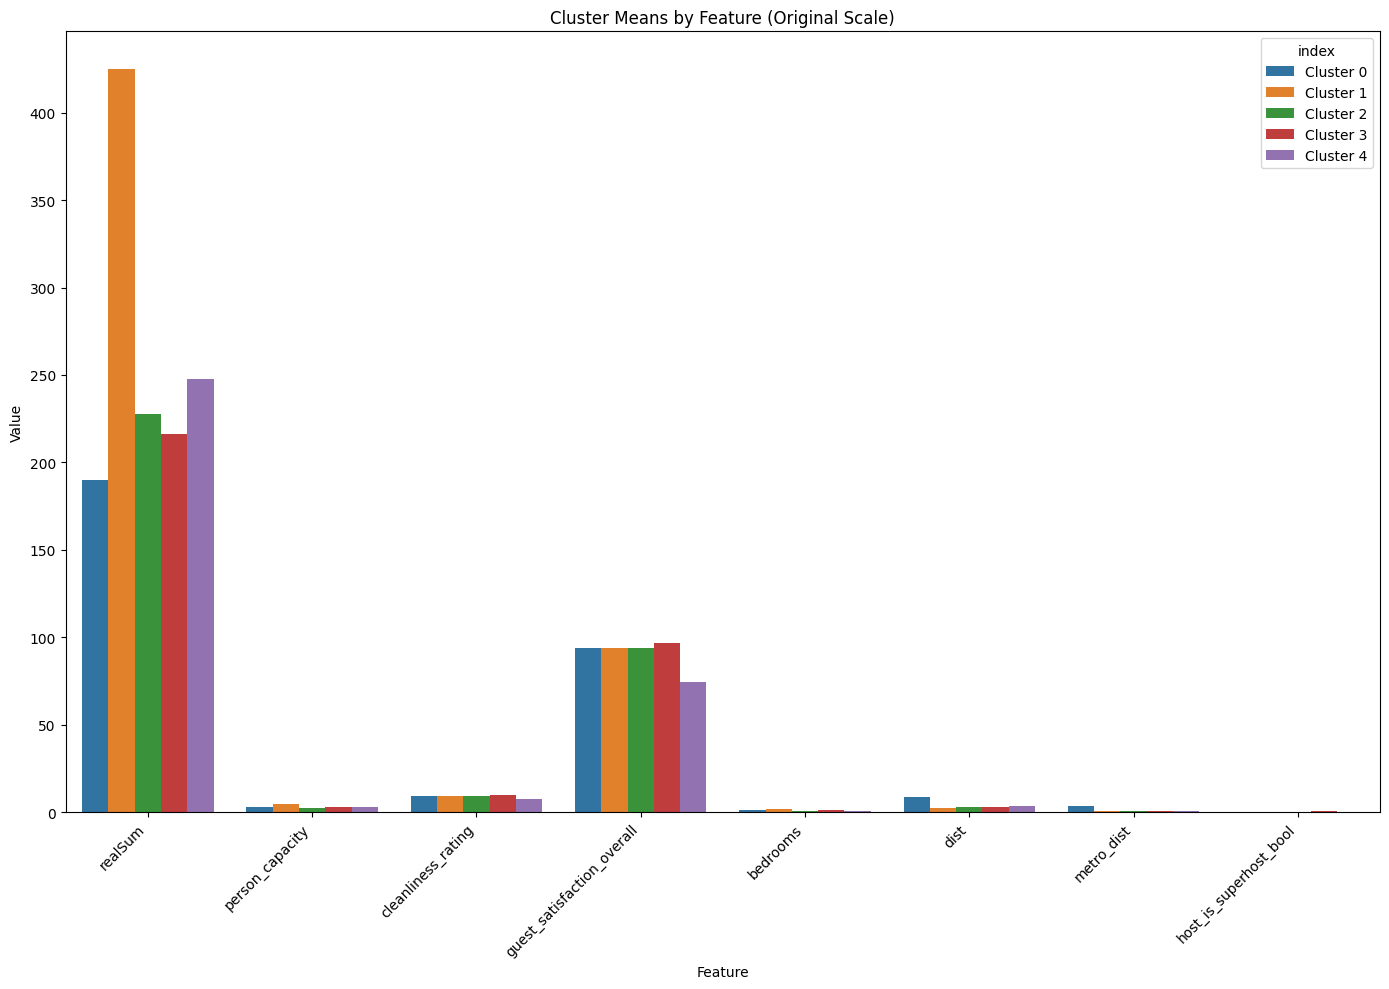

In [52]:
# Analyze the clusters
# Get the cluster centers and transform back to original scale
centers = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers)

# Create a DataFrame with the cluster centers
centers_df = pd.DataFrame(centers_original, columns=numerical_features)
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]

# Display the cluster centers using a clean styled table with alternating row colors
from IPython.display import display
import pandas as pd

# Format cluster centers table with alternating rows
centers_df_styled = centers_df.round(2).style.set_caption("Cluster Centers (Original Scale)")\
    .set_properties(**{
        'text-align': 'center',
        'color': 'black',
    })\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '16px')]},
        {'selector': 'th', 'props': [
            ('text-align', 'center'), 
            ('background-color', '#d9d9d9'),
            ('color', 'black'),
            ('font-weight', 'bold')
        ]},
        # Add alternating row colors
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'white')]},
    ])

display(centers_df_styled)

# Count listings per cluster
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_counts.index = [f'Cluster {i}' for i in range(optimal_k)]

# Create a DataFrame for the counts with percentages
count_df = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage': (cluster_counts / cluster_counts.sum() * 100).round(1).astype(str) + '%'
})

# Display cluster counts in a styled table
count_df_styled = count_df.style.set_caption("Listings per Cluster")\
    .set_properties(**{
        'text-align': 'center',
        'color': 'black',
    })\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '16px')]},
        {'selector': 'th', 'props': [
            ('text-align', 'center'), 
            ('background-color', '#d9d9d9'),
            ('color', 'black'),
            ('font-weight', 'bold')
        ]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'white')]},
    ])

print("\nCluster Sizes:")
display(count_df_styled)

# Visualize cluster characteristics with a radar chart
def radar_chart(df, title, colors=None):
    # Define feature groups - only include the requested ones
    feature_groups = {
        'Location': ['dist', 'metro_dist'],
        'Accommodation': ['bedrooms', 'person_capacity'],
        'Quality': ['cleanliness_rating', 'guest_satisfaction_overall'],
        'Price': ['realSum'],
        'Superhost': ['host_is_superhost_bool']
    }
    
    # Create a new DataFrame to store group averages
    group_df = pd.DataFrame(index=df.index)
    
    # Calculate the average for each feature group
    for group_name, features in feature_groups.items():
        # Filter to only include features that exist in our dataset
        valid_features = [f for f in features if f in df.columns]
        if valid_features:
            # Calculate the mean of all features in this group for each cluster
            group_df[group_name] = df[valid_features].mean(axis=1)
    
    # Number of variables (now feature groups instead of individual features)
    categories = list(group_df.columns)
    N = len(categories)
    
    # Normalize the data for the radar chart using Z-score normalization
    from scipy import stats
    
    # Create a copy of the dataframe for normalization
    normalized_df = pd.DataFrame(index=group_df.index, columns=group_df.columns)
    
    # Scale each feature group independently using Z-score normalization
    for col in group_df.columns:
        # Extract the column values
        feature_values = group_df[col].values
        # Apply Z-score normalization (mean=0, std=1)
        normalized_values = stats.zscore(feature_values)
        # Store in the normalized dataframe
        normalized_df[col] = normalized_values
    
    # Scale the Z-scores to [0,1] range for radar chart visualization
    # First find the min and max across all features
    min_val = normalized_df.values.min()
    max_val = normalized_df.values.max()
    
    # Scale to [0,1] range
    for col in normalized_df.columns:
        normalized_df[col] = (normalized_df[col] - min_val) / (max_val - min_val)
    
    print("Z-score normalized cluster means by feature group (scaled to [0,1] for visualization):")
    
    # Style the normalized values table with heat map coloring
    norm_df_styled = normalized_df.round(2).style\
        .background_gradient(cmap='Blues')\
        .set_properties(**{
            'text-align': 'center',
            'font-weight': 'bold'
        })\
        .set_table_styles([
            {'selector': 'th', 'props': [
                ('text-align', 'center'), 
                ('background-color', '#d9d9d9'),
                ('color', 'black'),
                ('font-weight', 'bold')
            ]},
        ])
    
    display(norm_df_styled)
    
    # Calculate angles for the radar chart
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
    
    # If no colors provided, use default colormap
    if colors is None:
        colors = plt.cm.viridis(np.linspace(0, 1, len(group_df.index)))
    
    # Plot each cluster
    for i, cluster in enumerate(group_df.index):
        values = normalized_df.loc[cluster, categories].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=cluster, color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])
    
    # Set category labels
    plt.xticks(angles[:-1], categories, size=12)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    
    # Add gridlines and adjust their appearance
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10)
    plt.ylim(0, 1)
    
    plt.title(title, size=20, y=1.1)
    return fig, ax

# Create the radar chart with Z-score normalization based on the requested feature groups
radar_chart(centers_df, "Cluster Characteristics: Location, Accommodation, Quality, Price, Superhost")
plt.show()

## K-Means Clustering Analysis

The K-Means clustering helps us identify natural groupings in the Airbnb listings data. The process was:

1. **Feature Selection**: Used numerical features like price, capacity, ratings, etc.
2. **Data Standardization**: Scaled features to have mean=0 and std=1
3. **Optimal K Selection**: Used the elbow method to determine the best number of clusters
4. **Dimensionality Reduction**: Applied PCA to visualize high-dimensional data in 2D
5. **Visualization**: Created scatter plot of clusters and radar chart of cluster characteristics

### Interpretation of Results:

- **Cluster Visualization**: The scatter plot shows the distribution of listings in 2D space, with colors representing different clusters and size indicating price
- **Cluster Centers**: The table shows the average values of each feature for each cluster
- **Radar Chart**: Displays the relative values of features across clusters, helping identify what makes each cluster unique
- **Feature Normalization**: Each feature is independently normalized across clusters to better highlight differences

This clustering can help hosts and travelers understand different market segments within the Airbnb ecosystem.